# EDA

In [ ]:
orders = pd.read_csv('/content/drive/MyDrive/Final Project/olist_orders_dataset.csv')

customers = pd.read_csv('/content/drive/MyDrive/Final Project/olist_customers_dataset.csv')
geoloc = pd.read_csv('/content/drive/MyDrive/Final Project/olist_geolocation_dataset.csv')
items = pd.read_csv('/content/drive/MyDrive/Final Project/olist_order_items_dataset.csv')
payments = pd.read_csv('/content/drive/MyDrive/Final Project/olist_order_payments_dataset.csv')
reviews = pd.read_csv('/content/drive/MyDrive/Final Project/olist_order_reviews_dataset.csv')
products = pd.read_csv('/content/drive/MyDrive/Final Project/olist_products_dataset.csv')
sellers = pd.read_csv('/content/drive/MyDrive/Final Project/olist_sellers_dataset.csv')
products_en = pd.read_csv('/content/drive/MyDrive/Final Project/product_category_name_translation.csv')

#Dataframe Preparation for Modelling (RAPIH)

##Add customers dataset

In [ ]:
olist_new = orders.merge(customers, how='left', on='customer_id')

In [ ]:
#recheck again
olist_new['customer_id'].value_counts()

,count
customer_id,
9ef432eb6251297304e76186b10a928d,1
413f7e58270a32396af030a075b924be,1
eb4350b67a0264c67e5e06a038e4afbb,1
622b07d262d545d16efbd4363a89cb91,1
c701fbfa77791abd05eef9eacf7ea7a8,1
...,...
39585f08d13377e50fde35467984e6eb,1
eb3d995301c320683de629f5b4dd0c78,1
f2507ea56d748a23037bb1214964e87d,1


##Add Payments dataset

In [ ]:
payments

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54


In [ ]:
#check awal
payments['order_id'].value_counts()

,count
order_id,
fa65dad1b0e818e3ccc5cb0e39231352,29
ccf804e764ed5650cd8759557269dc13,26
285c2e15bebd4ac83635ccc563dc71f4,22
895ab968e7bb0d5659d16cd74cd1650c,21
fedcd9f7ccdc8cba3a18defedd1a5547,19
...,...
6d2a30c9b7dcee3ed507dc9a601f99e7,1
a7737f6d9208dd56ea498a322ed3c37f,1
646e62df54f3e236eb6d5ff3b31429b8,1


In [ ]:
import pandas as pd

# Misalkan 'payments' adalah DataFrame yang sudah ada

# 1. Menghitung max payment_sequential per order_id
payment_sequential_count = payments.groupby('order_id')['payment_sequential'].max()

# 2. Menghitung distinct count dari payment_type per order_id
payment_type_distinct_count = payments.groupby('order_id')['payment_type'].nunique().reset_index(name='payment_type_count')

# 3. Menghitung median payment_value per order_id
payment_value_median = payments.groupby('order_id')['payment_value'].median()

# Gabungkan hasilnya
payments_new = payment_sequential_count.reset_index()
payments_new = payments_new.merge(payment_value_median.reset_index(), on='order_id', how='left')

# Gabungkan dengan hasil payment_type_distinct_count
payments_new = payments_new.merge(payment_type_distinct_count, on='order_id', how='left')

# Tampilkan hasil
payments_new.sample(10)

,order_id,payment_sequential,payment_value,payment_type_count
33597,56740543d19104f08eee3703abfcfa59,2,51.37,2
69199,b28172a3fb839825322c132046f1bd8d,1,263.36,1
34394,589933ac523b325d3739a6540f7f6715,1,65.23,1
95442,f5c1445b3732010dc5ad14eff121f7d0,1,113.16,1
77020,c63848e969568be35bddd0e96f1c4285,1,47.68,1
30768,4f0ae5e0706a3e90f9f36d0f34fe60aa,1,92.78,1
39491,65c863d90026e9dd4888e28d2135c983,2,38.43,2
32555,53d3436f6601750ca39cfa46de24c6ec,1,25.67,1
79559,ccd2795b4fd33757b039fb15b8a12109,1,86.04,1
12611,2081951727bfe945199ff7bea30cbd1a,1,193.55,1


In [ ]:
#compare payments new
payments_new[payments_new['order_id'] == '895ab968e7bb0d5659d16cd74cd1650c']

,order_id,payment_sequential,payment_value,payment_type_count
53168,895ab968e7bb0d5659d16cd74cd1650c,21,2.61,1


In [ ]:
#compare payments old
payments[payments['order_id'] == '895ab968e7bb0d5659d16cd74cd1650c']

,order_id,payment_sequential,payment_type,payment_installments,payment_value
4315,895ab968e7bb0d5659d16cd74cd1650c,17,voucher,1,16.70
9319,895ab968e7bb0d5659d16cd74cd1650c,1,voucher,1,2.61
19993,895ab968e7bb0d5659d16cd74cd1650c,13,voucher,1,16.70
21884,895ab968e7bb0d5659d16cd74cd1650c,16,voucher,1,16.70
29490,895ab968e7bb0d5659d16cd74cd1650c,19,voucher,1,0.24
41528,895ab968e7bb0d5659d16cd74cd1650c,4,voucher,1,2.61
46437,895ab968e7bb0d5659d16cd74cd1650c,21,voucher,1,0.28
52639,895ab968e7bb0d5659d16cd74cd1650c,2,voucher,1,2.61
53054,895ab968e7bb0d5659d16cd74cd1650c,12,voucher,1,16.70
56641,895ab968e7bb0d5659d16cd74cd1650c,18,voucher,1,1.31


In [ ]:
#rechek again
payments_new['order_id'].value_counts()

,count
order_id,
00010242fe8c5a6d1ba2dd792cb16214,1
ab2830d9aa052d7aee54359bc3f61d0c,1
ab30f8d4ebb7d33d1dcf54d420ea42cd,1
ab30f399d360ddf62897051d813f887d,1
ab30819331b8ee6115370bcfa01a8350,1
...,...
55538582ef35a95e5ed4047c6bf04695,1
5553543e89ef381e4ff08f6b91b94690,1
55534471fcbe2dd1436234e7cfa4de5a,1


In [ ]:
#digabungkan ke bisa
olist_new = olist_new.merge(payments_new, how='left', on='order_id')

In [ ]:
#recheck again
olist_new['order_id'].value_counts()

,count
order_id,
e481f51cbdc54678b7cc49136f2d6af7,1
f01059d0d674e1282df4e8fbbe015aa2,1
fbc17f0f2a2125054d5ac5c22d2d5120,1
9373150545066777b1cd2bc20e93cf8e,1
917399e96f92268dfa2c0351b1b75fba,1
...,...
6b8986012d61963295ffa3ea869aff86,1
be879f757debd3b384b540daa6ddd97e,1
ac3ce7eda1246f39509a505242fcc169,1


##Add reviews

In [ ]:
#check awal
reviews['order_id'].value_counts()

,count
order_id,
c88b1d1b157a9999ce368f218a407141,3
8e17072ec97ce29f0e1f111e598b0c85,3
df56136b8031ecd28e200bb18e6ddb2e,3
03c939fd7fd3b38f8485a0f95798f1f6,3
5cb890a68b91b6158d69257e4e2bc359,2
...,...
5b4e9a12d219f34f5c2de9f8d620b19d,1
a6da096d974acc000962856d7386448a,1
75e0647c26de647eca3421e9cc66c9da,1


In [ ]:
reviews[reviews['order_id'] == '5cb890a68b91b6158d69257e4e2bc359']

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
36300,60ecfec095e1310b906b2959b8cc1ec3,5cb890a68b91b6158d69257e4e2bc359,4,NaN,Recebimento parcial dos produtos,2018-02-02 00:00:00,2018-02-05 21:37:54
52339,6c06ac3750df49afd530abd1115cbf11,5cb890a68b91b6158d69257e4e2bc359,5,NaN,Porém chegou sem as baterias.,2018-02-08 00:00:00,2018-02-09 13:28:16


In [ ]:
# Misalkan 'reviews' adalah DataFrame yang sudah ada

# Menghitung median dari 'review_score' untuk setiap 'order_id'
reviews_new = reviews.groupby('order_id')['review_score'].median().reset_index()

# Tampilkan hasil
reviews_new.head()

,order_id,review_score
0,00010242fe8c5a6d1ba2dd792cb16214,5.0
1,00018f77f2f0320c557190d7a144bdd3,4.0
2,000229ec398224ef6ca0657da4fc703e,5.0
3,00024acbcdf0a6daa1e931b038114c75,4.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,5.0


In [ ]:
#compare payments new
reviews_new[reviews_new['order_id'] == '5cb890a68b91b6158d69257e4e2bc359']

,order_id,review_score
35641,5cb890a68b91b6158d69257e4e2bc359,4.5


In [ ]:
#compare payments old
reviews[reviews['order_id'] == '5cb890a68b91b6158d69257e4e2bc359']

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
36300,60ecfec095e1310b906b2959b8cc1ec3,5cb890a68b91b6158d69257e4e2bc359,4,NaN,Recebimento parcial dos produtos,2018-02-02 00:00:00,2018-02-05 21:37:54
52339,6c06ac3750df49afd530abd1115cbf11,5cb890a68b91b6158d69257e4e2bc359,5,NaN,Porém chegou sem as baterias.,2018-02-08 00:00:00,2018-02-09 13:28:16


In [ ]:
#rechek again
reviews_new['order_id'].value_counts()

,count
order_id,
00010242fe8c5a6d1ba2dd792cb16214,1
ab0e35dd7151f7e3d72931b940b6a335,1
ab37728868ab54d404aeb0398696940d,1
ab377121ab607d829a167d9796781f67,1
ab3705f0d480eb14371c9b4fc007f339,1
...,...
55529dc7cb99d0befad66b19ad9adc8d,1
5552927954803697ef5ebf1431693061,1
555256eeec3c2ec4e64208bfad2ed800,1


In [ ]:
#digabungkan ke bisa
olist_new = olist_new.merge(reviews_new, how='left', on='order_id')

In [ ]:
#recheck again
olist_new['order_id'].value_counts()

,count
order_id,
e481f51cbdc54678b7cc49136f2d6af7,1
f01059d0d674e1282df4e8fbbe015aa2,1
fbc17f0f2a2125054d5ac5c22d2d5120,1
9373150545066777b1cd2bc20e93cf8e,1
917399e96f92268dfa2c0351b1b75fba,1
...,...
6b8986012d61963295ffa3ea869aff86,1
be879f757debd3b384b540daa6ddd97e,1
ac3ce7eda1246f39509a505242fcc169,1


In [ ]:
olist_new

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,payment_sequential,payment_value,payment_type_count,review_score
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3.0,18.12,2.0,4.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,1.0,141.46,1.0,4.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,1.0,179.12,1.0,5.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,1.0,72.20,1.0,5.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,1.0,28.62,1.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00,6359f309b166b0196dbf7ad2ac62bb5a,12209,sao jose dos campos,SP,1.0,85.08,1.0,5.0
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP,1.0,195.00,1.0,4.0
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA,1.0,271.01,1.0,5.0
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ,1.0,441.16,1.0,2.0


##Add product dataset

In [ ]:
#check awal
products['product_id'].value_counts()

,count
product_id,
1e9e8ef04dbcff4541ed26657ea517e5,1
d05cc9afc85771f597cf4bc9d8f12546,1
71b7afd92c42feab780d5ea512fc7348,1
5c5f3e091101bea69642eb3dd145b17d,1
16d47089f9bc7f16de16cc4bd3b9dd49,1
...,...
c154987c6780d1a2b579aae00e53485f,1
1a6c9da4039deae58c2b769f049ae121,1
4cb35e544a1de008f37e069f172f964e,1


In [ ]:
products[products['product_id'] == '1e9e8ef04dbcff4541ed26657ea517e5']

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_volume_cm3
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,2240.0


In [ ]:
import pandas as pd

# Misalkan 'products' adalah DataFrame yang sudah ada

# Membuat kolom 'product_volume_cm3' dengan perkalian antara product_length_cm, product_height_cm, dan product_width_cm
products['product_volume_cm3'] = products['product_length_cm'] * products['product_height_cm'] * products['product_width_cm']

# Membuat DataFrame baru dengan kolom yang diinginkan
products_new = products[['product_id', 'product_category_name', 'product_name_lenght',
                         'product_description_lenght', 'product_photos_qty',
                         'product_weight_g', 'product_volume_cm3']]

# Tampilkan hasil
products_new.sample(5)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_volume_cm3
27730,d8a4f1d4d25d65f4325df92439fbb248,moveis_decoracao,54.0,1749.0,3.0,2300.0,22050.0
22258,62f7d6b239a31f7931c5b769313887d3,cama_mesa_banho,57.0,152.0,1.0,1500.0,8364.0
16292,cdad30e46a6fc84785a525ad6b5cf748,moveis_cozinha_area_de_servico_jantar_e_jardim,47.0,208.0,5.0,50.0,126000.0
22540,1b34988d6060d833cbe3bf2bdeeb67ab,automotivo,55.0,421.0,1.0,3000.0,18000.0
27100,14aa8b2c8709b5e12cf97b252e111a59,ferramentas_jardim,60.0,177.0,11.0,1000.0,14000.0


In [ ]:
#digabungkan ke items dataset
items = items.merge(products_new, how='left', on='product_id')

In [ ]:
#recheck again
items

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_volume_cm3
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,4.0,650.0,3528.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,2.0,30000.0,60000.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,59.0,695.0,2.0,3050.0,14157.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,42.0,480.0,1.0,200.0,2400.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,59.0,409.0,1.0,3750.0,42000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,utilidades_domesticas,43.0,1002.0,3.0,10150.0,53400.0
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,informatica_acessorios,31.0,232.0,1.0,8950.0,44460.0
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,esporte_lazer,43.0,869.0,1.0,967.0,9576.0
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,informatica_acessorios,56.0,1306.0,1.0,100.0,8000.0


##Add items dataset

In [ ]:
#check awal
items['order_id'].value_counts()

,count
order_id,
8272b63d03f5f79c56e9e4120aec44ef,21
1b15974a0141d54e36626dca3fdc731a,20
ab14fdcfbe524636d65ee38360e22ce8,20
9ef13efd6949e4573a18964dd1bbe7f5,15
428a2f660dc84138d969ccd69a0ab6d5,15
...,...
5a0911d70c1f85d3bed0df1bf693a6dd,1
5a082b558a3798d3e36d93bfa8ca1eae,1
5a07264682e0b8fbb3f166edbbffc6e8,1


In [ ]:
items[items['order_id'] == '428a2f660dc84138d969ccd69a0ab6d5']

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_volume_cm3
29257,428a2f660dc84138d969ccd69a0ab6d5,1,89b190a046022486c635022524a974a8,f326006815956455b2859abd58fe7e39,2017-11-30 10:30:51,65.49,16.22,moveis_decoracao,59.0,1744.0,2.0,700.0,13950.0
29258,428a2f660dc84138d969ccd69a0ab6d5,2,89b190a046022486c635022524a974a8,f326006815956455b2859abd58fe7e39,2017-11-30 10:30:51,65.49,16.22,moveis_decoracao,59.0,1744.0,2.0,700.0,13950.0
29259,428a2f660dc84138d969ccd69a0ab6d5,3,89b190a046022486c635022524a974a8,f326006815956455b2859abd58fe7e39,2017-11-30 10:30:51,65.49,16.22,moveis_decoracao,59.0,1744.0,2.0,700.0,13950.0
29260,428a2f660dc84138d969ccd69a0ab6d5,4,89b190a046022486c635022524a974a8,f326006815956455b2859abd58fe7e39,2017-11-30 10:30:51,65.49,16.22,moveis_decoracao,59.0,1744.0,2.0,700.0,13950.0
29261,428a2f660dc84138d969ccd69a0ab6d5,5,89b190a046022486c635022524a974a8,f326006815956455b2859abd58fe7e39,2017-11-30 10:30:51,65.49,16.22,moveis_decoracao,59.0,1744.0,2.0,700.0,13950.0
29262,428a2f660dc84138d969ccd69a0ab6d5,6,89b190a046022486c635022524a974a8,f326006815956455b2859abd58fe7e39,2017-11-30 10:30:51,65.49,16.22,moveis_decoracao,59.0,1744.0,2.0,700.0,13950.0
29263,428a2f660dc84138d969ccd69a0ab6d5,7,89b190a046022486c635022524a974a8,f326006815956455b2859abd58fe7e39,2017-11-30 10:30:51,65.49,16.22,moveis_decoracao,59.0,1744.0,2.0,700.0,13950.0
29264,428a2f660dc84138d969ccd69a0ab6d5,8,89b190a046022486c635022524a974a8,f326006815956455b2859abd58fe7e39,2017-11-30 10:30:51,65.49,16.22,moveis_decoracao,59.0,1744.0,2.0,700.0,13950.0
29265,428a2f660dc84138d969ccd69a0ab6d5,9,89b190a046022486c635022524a974a8,f326006815956455b2859abd58fe7e39,2017-11-30 10:30:51,65.49,16.22,moveis_decoracao,59.0,1744.0,2.0,700.0,13950.0
29266,428a2f660dc84138d969ccd69a0ab6d5,10,89b190a046022486c635022524a974a8,f326006815956455b2859abd58fe7e39,2017-11-30 10:30:51,65.49,16.22,moveis_decoracao,59.0,1744.0,2.0,700.0,13950.0


In [ ]:
import pandas as pd
import numpy as np

# Misalkan 'items' adalah DataFrame yang sudah ada

# 1. Menghitung max dari 'order_item_id' pada setiap 'order_id'
order_item_id_max = items.groupby('order_id')['order_item_id'].max()

# 2. Menghitung unique count dari 'product_category_name' pada setiap 'order_id'
product_category_nunique = items.groupby('order_id')['product_category_name'].nunique()

# 3. Menghitung median dari kolom-kolom yang diperlukan pada setiap 'order_id'
median_columns = items.groupby('order_id').agg({
    'product_name_lenght': 'median',
    'product_description_lenght': 'median',
    'product_photos_qty': 'median',
    'product_weight_g': 'median',
    'product_volume_cm3': 'median',
    'price': 'mean',  # Menggunakan mean untuk price karena median dapat tidak tepat jika ada outliers
    'freight_value': 'mean'  # Menggunakan mean untuk freight_value juga
}).reset_index()

# Menggabungkan hasilnya
items_new = pd.concat([
    median_columns,
    order_item_id_max.reset_index(drop=True),
    product_category_nunique.reset_index(drop=True)
], axis=1)

# Ganti nama kolom
items_new.rename(columns={
    'product_name_lenght': 'product_name_length',
    'product_description_lenght': 'product_description_length',
    'product_photos_qty': 'product_photos_qty',
    'product_weight_g': 'product_weight_g',
    'product_volume_cm3': 'product_volume_cm3',
    'product_category_name': 'product_category_n'
}, inplace=True)

# Tampilkan hasil
items_new.head()

,order_id,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_volume_cm3,price,freight_value,order_item_id,product_category_n
0,00010242fe8c5a6d1ba2dd792cb16214,58.0,598.0,4.0,650.0,3528.0,58.90,13.29,1,1
1,00018f77f2f0320c557190d7a144bdd3,56.0,239.0,2.0,30000.0,60000.0,239.90,19.93,1,1
2,000229ec398224ef6ca0657da4fc703e,59.0,695.0,2.0,3050.0,14157.0,199.00,17.87,1,1
3,00024acbcdf0a6daa1e931b038114c75,42.0,480.0,1.0,200.0,2400.0,12.99,12.79,1,1
4,00042b26cf59d7ce69dfabb4e55b4fd9,59.0,409.0,1.0,3750.0,42000.0,199.90,18.14,1,1


In [ ]:
#compare payments new
items_new[items_new['order_id'] == '428a2f660dc84138d969ccd69a0ab6d5']

,order_id,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_volume_cm3,price,freight_value,order_item_id,product_category_n
25583,428a2f660dc84138d969ccd69a0ab6d5,59.0,1744.0,2.0,700.0,13950.0,65.49,16.22,15,1


In [ ]:
#compare payments old
items[items['order_id'] == '428a2f660dc84138d969ccd69a0ab6d5']

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_volume_cm3
29257,428a2f660dc84138d969ccd69a0ab6d5,1,89b190a046022486c635022524a974a8,f326006815956455b2859abd58fe7e39,2017-11-30 10:30:51,65.49,16.22,moveis_decoracao,59.0,1744.0,2.0,700.0,13950.0
29258,428a2f660dc84138d969ccd69a0ab6d5,2,89b190a046022486c635022524a974a8,f326006815956455b2859abd58fe7e39,2017-11-30 10:30:51,65.49,16.22,moveis_decoracao,59.0,1744.0,2.0,700.0,13950.0
29259,428a2f660dc84138d969ccd69a0ab6d5,3,89b190a046022486c635022524a974a8,f326006815956455b2859abd58fe7e39,2017-11-30 10:30:51,65.49,16.22,moveis_decoracao,59.0,1744.0,2.0,700.0,13950.0
29260,428a2f660dc84138d969ccd69a0ab6d5,4,89b190a046022486c635022524a974a8,f326006815956455b2859abd58fe7e39,2017-11-30 10:30:51,65.49,16.22,moveis_decoracao,59.0,1744.0,2.0,700.0,13950.0
29261,428a2f660dc84138d969ccd69a0ab6d5,5,89b190a046022486c635022524a974a8,f326006815956455b2859abd58fe7e39,2017-11-30 10:30:51,65.49,16.22,moveis_decoracao,59.0,1744.0,2.0,700.0,13950.0
29262,428a2f660dc84138d969ccd69a0ab6d5,6,89b190a046022486c635022524a974a8,f326006815956455b2859abd58fe7e39,2017-11-30 10:30:51,65.49,16.22,moveis_decoracao,59.0,1744.0,2.0,700.0,13950.0
29263,428a2f660dc84138d969ccd69a0ab6d5,7,89b190a046022486c635022524a974a8,f326006815956455b2859abd58fe7e39,2017-11-30 10:30:51,65.49,16.22,moveis_decoracao,59.0,1744.0,2.0,700.0,13950.0
29264,428a2f660dc84138d969ccd69a0ab6d5,8,89b190a046022486c635022524a974a8,f326006815956455b2859abd58fe7e39,2017-11-30 10:30:51,65.49,16.22,moveis_decoracao,59.0,1744.0,2.0,700.0,13950.0
29265,428a2f660dc84138d969ccd69a0ab6d5,9,89b190a046022486c635022524a974a8,f326006815956455b2859abd58fe7e39,2017-11-30 10:30:51,65.49,16.22,moveis_decoracao,59.0,1744.0,2.0,700.0,13950.0
29266,428a2f660dc84138d969ccd69a0ab6d5,10,89b190a046022486c635022524a974a8,f326006815956455b2859abd58fe7e39,2017-11-30 10:30:51,65.49,16.22,moveis_decoracao,59.0,1744.0,2.0,700.0,13950.0


In [ ]:
#rechek again
items_new['order_id'].value_counts()

,count
order_id,
00010242fe8c5a6d1ba2dd792cb16214,1
ab13cb6c13063f2603a94c9ddca34f66,1
ab3a669dbdc7a8d447bb6fc7a158cf94,1
ab3a6663f21c1a36401300460d3c41cd,1
ab3a0535e202529923e53dfdadf8042e,1
...,...
5561adcb0fd46da4cad3048fa4e7fc00,1
555e60e282181725debc9eb2d69fda3f,1
555e4d40fb6beea866d46eb6a5a01b41,1


In [ ]:
#digabungkan ke bisa
olist_new = olist_new.merge(items_new, how='left', on='order_id')

In [ ]:
#recheck again
olist_new['order_id'].value_counts()

,count
order_id,
e481f51cbdc54678b7cc49136f2d6af7,1
f01059d0d674e1282df4e8fbbe015aa2,1
fbc17f0f2a2125054d5ac5c22d2d5120,1
9373150545066777b1cd2bc20e93cf8e,1
917399e96f92268dfa2c0351b1b75fba,1
...,...
6b8986012d61963295ffa3ea869aff86,1
be879f757debd3b384b540daa6ddd97e,1
ac3ce7eda1246f39509a505242fcc169,1


In [ ]:
olist_new

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,payment_sequential,payment_value,payment_type_count,review_score,freight_value_x,price_x,order_item_id_x,freight_value_y,price_y,order_item_id_y,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_volume_cm3,price,freight_value,order_item_id,product_category_n
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3.0,18.12,2.0,4.0,8.72,29.99,1.0,8.72,29.99,1.0,40.0,268.0,4.0,500.0,1976.0,29.99,8.72,1.0,1.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,1.0,141.46,1.0,4.0,22.76,118.70,1.0,22.76,118.70,1.0,29.0,178.0,1.0,400.0,4693.0,118.70,22.76,1.0,1.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,1.0,179.12,1.0,5.0,19.22,159.90,1.0,19.22,159.90,1.0,46.0,232.0,1.0,420.0,9576.0,159.90,19.22,1.0,1.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,1.0,72.20,1.0,5.0,27.20,45.00,1.0,27.20,45.00,1.0,59.0,468.0,3.0,450.0,6000.0,45.00,27.20,1.0,1.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,1.0,28.62,1.0,5.0,8.72,19.90,1.0,8.72,19.90,1.0,38.0,316.0,4.0,250.0,11475.0,19.90,8.72,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00,6359f309b166b0196dbf7ad2ac62bb5a,12209,sao jose dos campos,SP,1.0,85.08,1.0,5.0,13.08,72.00,1.0,13.08,72.00,1.0,50.0,1517.0,1.0,1175.0,5148.0,72.00,13.08,1.0,1.0
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP,1.0,195.00,1.0,4.0,20.10,174.90,1.0,20.10,174.90,1.0,52.0,828.0,4.0,4950.0,16000.0,174.90,20.10,1.0,1.0
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA,1.0,271.01,1.0,5.0,65.02,205.99,1.0,65.02,205.99,1.0,51.0,500.0,2.0,13300.0,63360.0,205.99,65.02,1.0,1.0
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ,1.0,441.16,1.0,2.0,40.59,179.99,2.0,40.59,179.99,2.0,59.0,1893.0,1.0,6550.0,8000.0,179.99,40.59,2.0,1.0


# CHURN PREDICTION

# DATAFRAME PREPARATION FOR MODEL

**Import Library**

In [ ]:
# Library : Basic
import numpy as np
import pandas as pd

# Library : Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Library : menghilangkan warnings
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

**Connect to Gdrive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Import Dataset**

In [ ]:
orders = pd.read_csv('/content/drive/MyDrive/Final Project/olist_orders_dataset.csv')

customers = pd.read_csv('/content/drive/MyDrive/Final Project/olist_customers_dataset.csv')
geoloc = pd.read_csv('/content/drive/MyDrive/Final Project/olist_geolocation_dataset.csv')
items = pd.read_csv('/content/drive/MyDrive/Final Project/olist_order_items_dataset.csv')
payments = pd.read_csv('/content/drive/MyDrive/Final Project/olist_order_payments_dataset.csv')
reviews = pd.read_csv('/content/drive/MyDrive/Final Project/olist_order_reviews_dataset.csv')
products = pd.read_csv('/content/drive/MyDrive/Final Project/olist_products_dataset.csv')
sellers = pd.read_csv('/content/drive/MyDrive/Final Project/olist_sellers_dataset.csv')
products_en = pd.read_csv('/content/drive/MyDrive/Final Project/product_category_name_translation.csv')

#DATAFRAME PREPARATION FOR MODEL

In [ ]:
# Show Unique data and n-unique in every Column
show_unique_cust = []

for x in customers.columns:
  show_unique_cust.append([x, customers[x].nunique(), customers[x].unique(), customers[x].dtype])

table_unique_cust = pd.DataFrame(columns=['Column Name','Number of Unique','Unique Value','Dtype'],
              data=show_unique_cust)

table_unique_cust

,Column Name,Number of Unique,Unique Value,Dtype
0,customer_id,99441,"[06b8999e2fba1a1fbc88172c00ba8bc7, 18955e83d33...",object
1,customer_unique_id,96096,"[861eff4711a542e4b93843c6dd7febb0, 290c77bc529...",object
2,customer_zip_code_prefix,14994,"[14409, 9790, 1151, 8775, 13056, 89254, 4534, ...",int64
3,customer_city,4119,"[franca, sao bernardo do campo, sao paulo, mog...",object
4,customer_state,27,"[SP, SC, MG, PR, RJ, RS, PA, GO, ES, BA, MA, M...",object


##Add customers dataset

In [ ]:
olist_new = orders.merge(customers, how='left', on='customer_id')

In [ ]:
#recheck again
olist_new['customer_id'].value_counts()

,count
customer_id,
9ef432eb6251297304e76186b10a928d,1
413f7e58270a32396af030a075b924be,1
eb4350b67a0264c67e5e06a038e4afbb,1
622b07d262d545d16efbd4363a89cb91,1
c701fbfa77791abd05eef9eacf7ea7a8,1
...,...
39585f08d13377e50fde35467984e6eb,1
eb3d995301c320683de629f5b4dd0c78,1
f2507ea56d748a23037bb1214964e87d,1


##Add Payments dataset

In [ ]:
payments

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54


In [ ]:
#check awal
payments['order_id'].value_counts()

,count
order_id,
fa65dad1b0e818e3ccc5cb0e39231352,29
ccf804e764ed5650cd8759557269dc13,26
285c2e15bebd4ac83635ccc563dc71f4,22
895ab968e7bb0d5659d16cd74cd1650c,21
fedcd9f7ccdc8cba3a18defedd1a5547,19
...,...
6d2a30c9b7dcee3ed507dc9a601f99e7,1
a7737f6d9208dd56ea498a322ed3c37f,1
646e62df54f3e236eb6d5ff3b31429b8,1


In [ ]:
import pandas as pd

# Misalkan 'payments' adalah DataFrame yang sudah ada

# 1. Menghitung max payment_sequential per order_id
payment_sequential_count = payments.groupby('order_id')['payment_sequential'].max()

# 2. Menghitung distinct count dari payment_type per order_id
payment_type_distinct_count = payments.groupby('order_id')['payment_type'].nunique().reset_index(name='payment_type_count')

# 3. Menghitung median payment_value per order_id
payment_value_median = payments.groupby('order_id')['payment_value'].median()

# Gabungkan hasilnya
payments_new = payment_sequential_count.reset_index()
payments_new = payments_new.merge(payment_value_median.reset_index(), on='order_id', how='left')

# Gabungkan dengan hasil payment_type_distinct_count
payments_new = payments_new.merge(payment_type_distinct_count, on='order_id', how='left')

# Tampilkan hasil
payments_new.sample(10)

,order_id,payment_sequential,payment_value,payment_type_count
33597,56740543d19104f08eee3703abfcfa59,2,51.37,2
69199,b28172a3fb839825322c132046f1bd8d,1,263.36,1
34394,589933ac523b325d3739a6540f7f6715,1,65.23,1
95442,f5c1445b3732010dc5ad14eff121f7d0,1,113.16,1
77020,c63848e969568be35bddd0e96f1c4285,1,47.68,1
30768,4f0ae5e0706a3e90f9f36d0f34fe60aa,1,92.78,1
39491,65c863d90026e9dd4888e28d2135c983,2,38.43,2
32555,53d3436f6601750ca39cfa46de24c6ec,1,25.67,1
79559,ccd2795b4fd33757b039fb15b8a12109,1,86.04,1
12611,2081951727bfe945199ff7bea30cbd1a,1,193.55,1


In [ ]:
#compare payments new
payments_new[payments_new['order_id'] == '895ab968e7bb0d5659d16cd74cd1650c']

,order_id,payment_sequential,payment_value,payment_type_count
53168,895ab968e7bb0d5659d16cd74cd1650c,21,2.61,1


In [ ]:
#compare payments old
payments[payments['order_id'] == '895ab968e7bb0d5659d16cd74cd1650c']

,order_id,payment_sequential,payment_type,payment_installments,payment_value
4315,895ab968e7bb0d5659d16cd74cd1650c,17,voucher,1,16.70
9319,895ab968e7bb0d5659d16cd74cd1650c,1,voucher,1,2.61
19993,895ab968e7bb0d5659d16cd74cd1650c,13,voucher,1,16.70
21884,895ab968e7bb0d5659d16cd74cd1650c,16,voucher,1,16.70
29490,895ab968e7bb0d5659d16cd74cd1650c,19,voucher,1,0.24
41528,895ab968e7bb0d5659d16cd74cd1650c,4,voucher,1,2.61
46437,895ab968e7bb0d5659d16cd74cd1650c,21,voucher,1,0.28
52639,895ab968e7bb0d5659d16cd74cd1650c,2,voucher,1,2.61
53054,895ab968e7bb0d5659d16cd74cd1650c,12,voucher,1,16.70
56641,895ab968e7bb0d5659d16cd74cd1650c,18,voucher,1,1.31


In [ ]:
#rechek again
payments_new['order_id'].value_counts()

,count
order_id,
00010242fe8c5a6d1ba2dd792cb16214,1
ab2830d9aa052d7aee54359bc3f61d0c,1
ab30f8d4ebb7d33d1dcf54d420ea42cd,1
ab30f399d360ddf62897051d813f887d,1
ab30819331b8ee6115370bcfa01a8350,1
...,...
55538582ef35a95e5ed4047c6bf04695,1
5553543e89ef381e4ff08f6b91b94690,1
55534471fcbe2dd1436234e7cfa4de5a,1


In [ ]:
#digabungkan ke bisa
olist_new = olist_new.merge(payments_new, how='left', on='order_id')

In [ ]:
#recheck again
olist_new['order_id'].value_counts()

,count
order_id,
e481f51cbdc54678b7cc49136f2d6af7,1
f01059d0d674e1282df4e8fbbe015aa2,1
fbc17f0f2a2125054d5ac5c22d2d5120,1
9373150545066777b1cd2bc20e93cf8e,1
917399e96f92268dfa2c0351b1b75fba,1
...,...
6b8986012d61963295ffa3ea869aff86,1
be879f757debd3b384b540daa6ddd97e,1
ac3ce7eda1246f39509a505242fcc169,1


##Add reviews

In [ ]:
#check awal
reviews['order_id'].value_counts()

,count
order_id,
c88b1d1b157a9999ce368f218a407141,3
8e17072ec97ce29f0e1f111e598b0c85,3
df56136b8031ecd28e200bb18e6ddb2e,3
03c939fd7fd3b38f8485a0f95798f1f6,3
5cb890a68b91b6158d69257e4e2bc359,2
...,...
5b4e9a12d219f34f5c2de9f8d620b19d,1
a6da096d974acc000962856d7386448a,1
75e0647c26de647eca3421e9cc66c9da,1


In [ ]:
reviews[reviews['order_id'] == '5cb890a68b91b6158d69257e4e2bc359']

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
36300,60ecfec095e1310b906b2959b8cc1ec3,5cb890a68b91b6158d69257e4e2bc359,4,NaN,Recebimento parcial dos produtos,2018-02-02 00:00:00,2018-02-05 21:37:54
52339,6c06ac3750df49afd530abd1115cbf11,5cb890a68b91b6158d69257e4e2bc359,5,NaN,Porém chegou sem as baterias.,2018-02-08 00:00:00,2018-02-09 13:28:16


In [ ]:
# Misalkan 'reviews' adalah DataFrame yang sudah ada

# Menghitung median dari 'review_score' untuk setiap 'order_id'
reviews_new = reviews.groupby('order_id')['review_score'].median().reset_index()

# Tampilkan hasil
reviews_new.head()

,order_id,review_score
0,00010242fe8c5a6d1ba2dd792cb16214,5.0
1,00018f77f2f0320c557190d7a144bdd3,4.0
2,000229ec398224ef6ca0657da4fc703e,5.0
3,00024acbcdf0a6daa1e931b038114c75,4.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,5.0


In [ ]:
#compare payments new
reviews_new[reviews_new['order_id'] == '5cb890a68b91b6158d69257e4e2bc359']

,order_id,review_score
35641,5cb890a68b91b6158d69257e4e2bc359,4.5


In [ ]:
#compare payments old
reviews[reviews['order_id'] == '5cb890a68b91b6158d69257e4e2bc359']

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
36300,60ecfec095e1310b906b2959b8cc1ec3,5cb890a68b91b6158d69257e4e2bc359,4,NaN,Recebimento parcial dos produtos,2018-02-02 00:00:00,2018-02-05 21:37:54
52339,6c06ac3750df49afd530abd1115cbf11,5cb890a68b91b6158d69257e4e2bc359,5,NaN,Porém chegou sem as baterias.,2018-02-08 00:00:00,2018-02-09 13:28:16


In [ ]:
#rechek again
reviews_new['order_id'].value_counts()

,count
order_id,
00010242fe8c5a6d1ba2dd792cb16214,1
ab0e35dd7151f7e3d72931b940b6a335,1
ab37728868ab54d404aeb0398696940d,1
ab377121ab607d829a167d9796781f67,1
ab3705f0d480eb14371c9b4fc007f339,1
...,...
55529dc7cb99d0befad66b19ad9adc8d,1
5552927954803697ef5ebf1431693061,1
555256eeec3c2ec4e64208bfad2ed800,1


In [ ]:
#digabungkan ke bisa
olist_new = olist_new.merge(reviews_new, how='left', on='order_id')

In [ ]:
#recheck again
olist_new['order_id'].value_counts()

,count
order_id,
e481f51cbdc54678b7cc49136f2d6af7,1
f01059d0d674e1282df4e8fbbe015aa2,1
fbc17f0f2a2125054d5ac5c22d2d5120,1
9373150545066777b1cd2bc20e93cf8e,1
917399e96f92268dfa2c0351b1b75fba,1
...,...
6b8986012d61963295ffa3ea869aff86,1
be879f757debd3b384b540daa6ddd97e,1
ac3ce7eda1246f39509a505242fcc169,1


In [ ]:
olist_new

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,payment_sequential,payment_value,payment_type_count,review_score
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3.0,18.12,2.0,4.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,1.0,141.46,1.0,4.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,1.0,179.12,1.0,5.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,1.0,72.20,1.0,5.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,1.0,28.62,1.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00,6359f309b166b0196dbf7ad2ac62bb5a,12209,sao jose dos campos,SP,1.0,85.08,1.0,5.0
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP,1.0,195.00,1.0,4.0
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA,1.0,271.01,1.0,5.0
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ,1.0,441.16,1.0,2.0


##Add product dataset

In [ ]:
#check awal
products['product_id'].value_counts()

,count
product_id,
1e9e8ef04dbcff4541ed26657ea517e5,1
d05cc9afc85771f597cf4bc9d8f12546,1
71b7afd92c42feab780d5ea512fc7348,1
5c5f3e091101bea69642eb3dd145b17d,1
16d47089f9bc7f16de16cc4bd3b9dd49,1
...,...
c154987c6780d1a2b579aae00e53485f,1
1a6c9da4039deae58c2b769f049ae121,1
4cb35e544a1de008f37e069f172f964e,1


In [ ]:
products[products['product_id'] == '1e9e8ef04dbcff4541ed26657ea517e5']

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_volume_cm3
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,2240.0


In [ ]:
import pandas as pd

# Misalkan 'products' adalah DataFrame yang sudah ada

# Membuat kolom 'product_volume_cm3' dengan perkalian antara product_length_cm, product_height_cm, dan product_width_cm
products['product_volume_cm3'] = products['product_length_cm'] * products['product_height_cm'] * products['product_width_cm']

# Membuat DataFrame baru dengan kolom yang diinginkan
products_new = products[['product_id', 'product_category_name', 'product_name_lenght',
                         'product_description_lenght', 'product_photos_qty',
                         'product_weight_g', 'product_volume_cm3']]

# Tampilkan hasil
products_new.sample(5)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_volume_cm3
27730,d8a4f1d4d25d65f4325df92439fbb248,moveis_decoracao,54.0,1749.0,3.0,2300.0,22050.0
22258,62f7d6b239a31f7931c5b769313887d3,cama_mesa_banho,57.0,152.0,1.0,1500.0,8364.0
16292,cdad30e46a6fc84785a525ad6b5cf748,moveis_cozinha_area_de_servico_jantar_e_jardim,47.0,208.0,5.0,50.0,126000.0
22540,1b34988d6060d833cbe3bf2bdeeb67ab,automotivo,55.0,421.0,1.0,3000.0,18000.0
27100,14aa8b2c8709b5e12cf97b252e111a59,ferramentas_jardim,60.0,177.0,11.0,1000.0,14000.0


In [ ]:
#digabungkan ke items dataset
items = items.merge(products_new, how='left', on='product_id')

In [ ]:
#recheck again
items

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_volume_cm3
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,4.0,650.0,3528.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,2.0,30000.0,60000.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,59.0,695.0,2.0,3050.0,14157.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,42.0,480.0,1.0,200.0,2400.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,59.0,409.0,1.0,3750.0,42000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,utilidades_domesticas,43.0,1002.0,3.0,10150.0,53400.0
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,informatica_acessorios,31.0,232.0,1.0,8950.0,44460.0
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,esporte_lazer,43.0,869.0,1.0,967.0,9576.0
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,informatica_acessorios,56.0,1306.0,1.0,100.0,8000.0


##Add items dataset

In [ ]:
#check awal
items['order_id'].value_counts()

,count
order_id,
8272b63d03f5f79c56e9e4120aec44ef,21
1b15974a0141d54e36626dca3fdc731a,20
ab14fdcfbe524636d65ee38360e22ce8,20
9ef13efd6949e4573a18964dd1bbe7f5,15
428a2f660dc84138d969ccd69a0ab6d5,15
...,...
5a0911d70c1f85d3bed0df1bf693a6dd,1
5a082b558a3798d3e36d93bfa8ca1eae,1
5a07264682e0b8fbb3f166edbbffc6e8,1


In [ ]:
items[items['order_id'] == '428a2f660dc84138d969ccd69a0ab6d5']

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_volume_cm3
29257,428a2f660dc84138d969ccd69a0ab6d5,1,89b190a046022486c635022524a974a8,f326006815956455b2859abd58fe7e39,2017-11-30 10:30:51,65.49,16.22,moveis_decoracao,59.0,1744.0,2.0,700.0,13950.0
29258,428a2f660dc84138d969ccd69a0ab6d5,2,89b190a046022486c635022524a974a8,f326006815956455b2859abd58fe7e39,2017-11-30 10:30:51,65.49,16.22,moveis_decoracao,59.0,1744.0,2.0,700.0,13950.0
29259,428a2f660dc84138d969ccd69a0ab6d5,3,89b190a046022486c635022524a974a8,f326006815956455b2859abd58fe7e39,2017-11-30 10:30:51,65.49,16.22,moveis_decoracao,59.0,1744.0,2.0,700.0,13950.0
29260,428a2f660dc84138d969ccd69a0ab6d5,4,89b190a046022486c635022524a974a8,f326006815956455b2859abd58fe7e39,2017-11-30 10:30:51,65.49,16.22,moveis_decoracao,59.0,1744.0,2.0,700.0,13950.0
29261,428a2f660dc84138d969ccd69a0ab6d5,5,89b190a046022486c635022524a974a8,f326006815956455b2859abd58fe7e39,2017-11-30 10:30:51,65.49,16.22,moveis_decoracao,59.0,1744.0,2.0,700.0,13950.0
29262,428a2f660dc84138d969ccd69a0ab6d5,6,89b190a046022486c635022524a974a8,f326006815956455b2859abd58fe7e39,2017-11-30 10:30:51,65.49,16.22,moveis_decoracao,59.0,1744.0,2.0,700.0,13950.0
29263,428a2f660dc84138d969ccd69a0ab6d5,7,89b190a046022486c635022524a974a8,f326006815956455b2859abd58fe7e39,2017-11-30 10:30:51,65.49,16.22,moveis_decoracao,59.0,1744.0,2.0,700.0,13950.0
29264,428a2f660dc84138d969ccd69a0ab6d5,8,89b190a046022486c635022524a974a8,f326006815956455b2859abd58fe7e39,2017-11-30 10:30:51,65.49,16.22,moveis_decoracao,59.0,1744.0,2.0,700.0,13950.0
29265,428a2f660dc84138d969ccd69a0ab6d5,9,89b190a046022486c635022524a974a8,f326006815956455b2859abd58fe7e39,2017-11-30 10:30:51,65.49,16.22,moveis_decoracao,59.0,1744.0,2.0,700.0,13950.0
29266,428a2f660dc84138d969ccd69a0ab6d5,10,89b190a046022486c635022524a974a8,f326006815956455b2859abd58fe7e39,2017-11-30 10:30:51,65.49,16.22,moveis_decoracao,59.0,1744.0,2.0,700.0,13950.0


In [ ]:
import pandas as pd
import numpy as np

# Misalkan 'items' adalah DataFrame yang sudah ada

# 1. Menghitung max dari 'order_item_id' pada setiap 'order_id'
order_item_id_max = items.groupby('order_id')['order_item_id'].max()

# 2. Menghitung unique count dari 'product_category_name' pada setiap 'order_id'
product_category_nunique = items.groupby('order_id')['product_category_name'].nunique()

# 3. Menghitung median dari kolom-kolom yang diperlukan pada setiap 'order_id'
median_columns = items.groupby('order_id').agg({
    'product_name_lenght': 'median',
    'product_description_lenght': 'median',
    'product_photos_qty': 'median',
    'product_weight_g': 'median',
    'product_volume_cm3': 'median',
    'price': 'mean',  # Menggunakan mean untuk price karena median dapat tidak tepat jika ada outliers
    'freight_value': 'mean'  # Menggunakan mean untuk freight_value juga
}).reset_index()

# Menggabungkan hasilnya
items_new = pd.concat([
    median_columns,
    order_item_id_max.reset_index(drop=True),
    product_category_nunique.reset_index(drop=True)
], axis=1)

# Ganti nama kolom
items_new.rename(columns={
    'product_name_lenght': 'product_name_length',
    'product_description_lenght': 'product_description_length',
    'product_photos_qty': 'product_photos_qty',
    'product_weight_g': 'product_weight_g',
    'product_volume_cm3': 'product_volume_cm3',
    'product_category_name': 'product_category_n'
}, inplace=True)

# Tampilkan hasil
items_new.head()

,order_id,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_volume_cm3,price,freight_value,order_item_id,product_category_n
0,00010242fe8c5a6d1ba2dd792cb16214,58.0,598.0,4.0,650.0,3528.0,58.90,13.29,1,1
1,00018f77f2f0320c557190d7a144bdd3,56.0,239.0,2.0,30000.0,60000.0,239.90,19.93,1,1
2,000229ec398224ef6ca0657da4fc703e,59.0,695.0,2.0,3050.0,14157.0,199.00,17.87,1,1
3,00024acbcdf0a6daa1e931b038114c75,42.0,480.0,1.0,200.0,2400.0,12.99,12.79,1,1
4,00042b26cf59d7ce69dfabb4e55b4fd9,59.0,409.0,1.0,3750.0,42000.0,199.90,18.14,1,1


In [ ]:
#compare payments new
items_new[items_new['order_id'] == '428a2f660dc84138d969ccd69a0ab6d5']

,order_id,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_volume_cm3,price,freight_value,order_item_id,product_category_n
25583,428a2f660dc84138d969ccd69a0ab6d5,59.0,1744.0,2.0,700.0,13950.0,65.49,16.22,15,1


In [ ]:
#compare payments old
items[items['order_id'] == '428a2f660dc84138d969ccd69a0ab6d5']

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_volume_cm3
29257,428a2f660dc84138d969ccd69a0ab6d5,1,89b190a046022486c635022524a974a8,f326006815956455b2859abd58fe7e39,2017-11-30 10:30:51,65.49,16.22,moveis_decoracao,59.0,1744.0,2.0,700.0,13950.0
29258,428a2f660dc84138d969ccd69a0ab6d5,2,89b190a046022486c635022524a974a8,f326006815956455b2859abd58fe7e39,2017-11-30 10:30:51,65.49,16.22,moveis_decoracao,59.0,1744.0,2.0,700.0,13950.0
29259,428a2f660dc84138d969ccd69a0ab6d5,3,89b190a046022486c635022524a974a8,f326006815956455b2859abd58fe7e39,2017-11-30 10:30:51,65.49,16.22,moveis_decoracao,59.0,1744.0,2.0,700.0,13950.0
29260,428a2f660dc84138d969ccd69a0ab6d5,4,89b190a046022486c635022524a974a8,f326006815956455b2859abd58fe7e39,2017-11-30 10:30:51,65.49,16.22,moveis_decoracao,59.0,1744.0,2.0,700.0,13950.0
29261,428a2f660dc84138d969ccd69a0ab6d5,5,89b190a046022486c635022524a974a8,f326006815956455b2859abd58fe7e39,2017-11-30 10:30:51,65.49,16.22,moveis_decoracao,59.0,1744.0,2.0,700.0,13950.0
29262,428a2f660dc84138d969ccd69a0ab6d5,6,89b190a046022486c635022524a974a8,f326006815956455b2859abd58fe7e39,2017-11-30 10:30:51,65.49,16.22,moveis_decoracao,59.0,1744.0,2.0,700.0,13950.0
29263,428a2f660dc84138d969ccd69a0ab6d5,7,89b190a046022486c635022524a974a8,f326006815956455b2859abd58fe7e39,2017-11-30 10:30:51,65.49,16.22,moveis_decoracao,59.0,1744.0,2.0,700.0,13950.0
29264,428a2f660dc84138d969ccd69a0ab6d5,8,89b190a046022486c635022524a974a8,f326006815956455b2859abd58fe7e39,2017-11-30 10:30:51,65.49,16.22,moveis_decoracao,59.0,1744.0,2.0,700.0,13950.0
29265,428a2f660dc84138d969ccd69a0ab6d5,9,89b190a046022486c635022524a974a8,f326006815956455b2859abd58fe7e39,2017-11-30 10:30:51,65.49,16.22,moveis_decoracao,59.0,1744.0,2.0,700.0,13950.0
29266,428a2f660dc84138d969ccd69a0ab6d5,10,89b190a046022486c635022524a974a8,f326006815956455b2859abd58fe7e39,2017-11-30 10:30:51,65.49,16.22,moveis_decoracao,59.0,1744.0,2.0,700.0,13950.0


In [ ]:
#rechek again
items_new['order_id'].value_counts()

,count
order_id,
00010242fe8c5a6d1ba2dd792cb16214,1
ab13cb6c13063f2603a94c9ddca34f66,1
ab3a669dbdc7a8d447bb6fc7a158cf94,1
ab3a6663f21c1a36401300460d3c41cd,1
ab3a0535e202529923e53dfdadf8042e,1
...,...
5561adcb0fd46da4cad3048fa4e7fc00,1
555e60e282181725debc9eb2d69fda3f,1
555e4d40fb6beea866d46eb6a5a01b41,1


In [ ]:
#digabungkan ke bisa
olist_new = olist_new.merge(items_new, how='left', on='order_id')

In [ ]:
#recheck again
olist_new['order_id'].value_counts()

,count
order_id,
e481f51cbdc54678b7cc49136f2d6af7,1
f01059d0d674e1282df4e8fbbe015aa2,1
fbc17f0f2a2125054d5ac5c22d2d5120,1
9373150545066777b1cd2bc20e93cf8e,1
917399e96f92268dfa2c0351b1b75fba,1
...,...
6b8986012d61963295ffa3ea869aff86,1
be879f757debd3b384b540daa6ddd97e,1
ac3ce7eda1246f39509a505242fcc169,1


In [ ]:
olist_new

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,payment_sequential,payment_value,payment_type_count,review_score,freight_value_x,price_x,order_item_id_x,freight_value_y,price_y,order_item_id_y,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_volume_cm3,price,freight_value,order_item_id,product_category_n
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3.0,18.12,2.0,4.0,8.72,29.99,1.0,8.72,29.99,1.0,40.0,268.0,4.0,500.0,1976.0,29.99,8.72,1.0,1.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,1.0,141.46,1.0,4.0,22.76,118.70,1.0,22.76,118.70,1.0,29.0,178.0,1.0,400.0,4693.0,118.70,22.76,1.0,1.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,1.0,179.12,1.0,5.0,19.22,159.90,1.0,19.22,159.90,1.0,46.0,232.0,1.0,420.0,9576.0,159.90,19.22,1.0,1.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,1.0,72.20,1.0,5.0,27.20,45.00,1.0,27.20,45.00,1.0,59.0,468.0,3.0,450.0,6000.0,45.00,27.20,1.0,1.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,1.0,28.62,1.0,5.0,8.72,19.90,1.0,8.72,19.90,1.0,38.0,316.0,4.0,250.0,11475.0,19.90,8.72,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00,6359f309b166b0196dbf7ad2ac62bb5a,12209,sao jose dos campos,SP,1.0,85.08,1.0,5.0,13.08,72.00,1.0,13.08,72.00,1.0,50.0,1517.0,1.0,1175.0,5148.0,72.00,13.08,1.0,1.0
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP,1.0,195.00,1.0,4.0,20.10,174.90,1.0,20.10,174.90,1.0,52.0,828.0,4.0,4950.0,16000.0,174.90,20.10,1.0,1.0
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA,1.0,271.01,1.0,5.0,65.02,205.99,1.0,65.02,205.99,1.0,51.0,500.0,2.0,13300.0,63360.0,205.99,65.02,1.0,1.0
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ,1.0,441.16,1.0,2.0,40.59,179.99,2.0,40.59,179.99,2.0,59.0,1893.0,1.0,6550.0,8000.0,179.99,40.59,2.0,1.0


##Add Customer Dataset

In [ ]:
#digabungkan ke olist_new
olist_new = olist_new.merge(customers, how='left', on='customer_id')

#NEW OLIST2

## Create New Olist2

In [ ]:
olist_new

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id_x,customer_zip_code_prefix_x,customer_city_x,customer_state_x,payment_sequential,payment_value,payment_type_count,review_score,freight_value_x,price_x,order_item_id_x,freight_value_y,price_y,order_item_id_y,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_volume_cm3,price,freight_value,order_item_id,product_category_n,customer_unique_id_y,customer_zip_code_prefix_y,customer_city_y,customer_state_y
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3.0,18.12,2.0,4.0,8.72,29.99,1.0,8.72,29.99,1.0,40.0,268.0,4.0,500.0,1976.0,29.99,8.72,1.0,1.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,1.0,141.46,1.0,4.0,22.76,118.70,1.0,22.76,118.70,1.0,29.0,178.0,1.0,400.0,4693.0,118.70,22.76,1.0,1.0,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,1.0,179.12,1.0,5.0,19.22,159.90,1.0,19.22,159.90,1.0,46.0,232.0,1.0,420.0,9576.0,159.90,19.22,1.0,1.0,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,1.0,72.20,1.0,5.0,27.20,45.00,1.0,27.20,45.00,1.0,59.0,468.0,3.0,450.0,6000.0,45.00,27.20,1.0,1.0,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,1.0,28.62,1.0,5.0,8.72,19.90,1.0,8.72,19.90,1.0,38.0,316.0,4.0,250.0,11475.0,19.90,8.72,1.0,1.0,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00,6359f309b166b0196dbf7ad2ac62bb5a,12209,sao jose dos campos,SP,1.0,85.08,1.0,5.0,13.08,72.00,1.0,13.08,72.00,1.0,50.0,1517.0,1.0,1175.0,5148.0,72.00,13.08,1.0,1.0,6359f309b166b0196dbf7ad2ac62bb5a,12209,sao jose dos campos,SP
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP,1.0,195.00,1.0,4.0,20.10,174.90,1.0,20.10,174.90,1.0,52.0,828.0,4.0,4950.0,16000.0,174.90,20.10,1.0,1.0,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA,1.0,271.01,1.0,5.0,65.02,205.99,1.0,65.02,205.99,1.0,51.0,500.0,2.0,13300.0,63360.0,205.99,65.02,1.0,1.0,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:2

In [ ]:
olist_new['order_status'].value_counts()

,count
order_status,
delivered,96478
shipped,1107
canceled,625
unavailable,609
invoiced,314
processing,301
created,5
approved,2


In [ ]:
olist_new[olist_new['order_status'] == 'created']

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id_x,customer_zip_code_prefix_x,customer_city_x,customer_state_x,payment_sequential,payment_value,payment_type_count,review_score,freight_value_x,price_x,order_item_id_x,freight_value_y,price_y,order_item_id_y,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_volume_cm3,price,freight_value,order_item_id,product_category_n,customer_unique_id_y,customer_zip_code_prefix_y,customer_city_y,customer_state_y,order_Payment_gap,Delivery_delay
7434,b5359909123fa03c50bdb0cfed07f098,438449d4af8980d107bf04571413a8e7,created,2017-12-05 01:07:52,NaT,NaN,NaT,2018-01-11,55fbb57fd54c35a38c80c2a032a6ca6e,15300,general salgado,SP,1.0,160.94,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55fbb57fd54c35a38c80c2a032a6ca6e,15300,general salgado,SP,NaN,NaN
9238,dba5062fbda3af4fb6c33b1e040ca38f,964a6df3d9bdf60fe3e7b8bb69ed893a,created,2018-02-09 17:21:04,NaT,NaN,NaT,2018-03-07,2e015e68fbfa36910263df5384e8e45c,73401,brasilia,DF,1.0,137.60,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2e015e68fbfa36910263df5384e8e45c,73401,brasilia,DF,NaN,NaN
21441,7a4df5d8cff4090e541401a20a22bb80,725e9c75605414b21fd8c8d5a1c2f1d6,created,2017-11-25 11:10:33,NaT,NaN,NaT,2017-12-12,355862aa14375fe3950ee04fef9c7a53,22621,rio de janeiro,RJ,1.0,37.84,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,355862aa14375fe3950ee04fef9c7a53,22621,rio de janeiro,RJ,NaN,NaN
55086,35de4050331c6c644cddc86f4f2d0d64,4ee64f4bfc542546f422da0aeb462853,created,2017-12-05 01:07:58,NaT,NaN,NaT,2018-01-08,10d5890ed5e7ec78a7db23b5ac579b17,93025,sao leopoldo,RS,1.0,105.87,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10d5890ed5e7ec78a7db23b5ac579b17,93025,sao leopoldo,RS,NaN,NaN
58958,90ab3e7d52544ec7bc3363c82689965f,7d61b9f4f216052ba664f22e9c504ef1,created,2017-11-06 13:12:34,NaT,NaN,NaT,2017-12-01,161e5b2b4513edb336986a8909218365,87720,paranavai,PR,1.0,245.85,1.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,161e5b2b4513edb336986a8909218365,87720,paranavai,PR,NaN,NaN


In [ ]:
import pandas as pd

# Mengonversi kolom tanggal menjadi tipe datetime
olist_new['order_purchase_timestamp'] = pd.to_datetime(olist_new['order_purchase_timestamp'])
olist_new['order_approved_at'] = pd.to_datetime(olist_new['order_approved_at'])
olist_new['order_delivered_customer_date'] = pd.to_datetime(olist_new['order_delivered_customer_date'])
olist_new['order_estimated_delivery_date'] = pd.to_datetime(olist_new['order_estimated_delivery_date'])

# Menghitung order_payment_gap dalam satuan menit
olist_new['order_payment_gap_mnt'] = (olist_new['order_approved_at'] - olist_new['order_purchase_timestamp']).dt.total_seconds() / 60

# Menghitung delivery_delay dalam satuan jam
olist_new['delivery_delay_hr'] = (olist_new['order_delivered_customer_date'] - olist_new['order_estimated_delivery_date']).dt.total_seconds() / 3600

# Menghitung active_order berdasarkan order_status yang relevan
valid_order_status = ['shipped', 'processing', 'approved', 'invoiced']
olist_new['active_order'] = olist_new['order_status'].apply(lambda x: 1 if x.lower() in valid_order_status else 0)

# Membuat dataframe baru dengan agregasi berdasarkan customer_unique_id
olist_new2 = olist_new.groupby('customer_unique_id_y').agg(
    customer_state=('customer_state_x', 'first'),
    order_payment_gap_mnt=('order_payment_gap_mnt', 'median'),
    delivery_delay_hr=('delivery_delay_hr', 'median'),
    order=('order_id', 'count'),
    active_order=('active_order', 'sum'),
    review_score=('review_score', 'median'),
    price=('price', 'median'),
    freight_value=('freight_value', 'median'),
    payment_sequential=('payment_sequential', 'median'),
    payment_value=('payment_value', 'median'),
    payment_type_count=('payment_type_count', 'median'),
    order_qty=('order_item_id_x', 'median'),
    product_category_n=('product_category_n', 'median'),
    product_volume_cm3=('product_volume_cm3', 'median'),
    product_weight_g=('product_weight_g', 'median'),
    product_name_lenght=('product_name_length', 'median'),
    product_description_lenght=('product_description_length', 'median'),
    product_photos_qty=('product_photos_qty', 'median')
).reset_index()

# Tampilkan hasil dataframe
olist_new2.head()

,customer_unique_id_y,customer_state,order_payment_gap_mnt,delivery_delay_hr,order,active_order,review_score,price,freight_value,payment_sequential,payment_value,payment_type_count,order_qty,product_category_n,product_volume_cm3,product_weight_g,product_name_lenght,product_description_lenght,product_photos_qty
0,0000366f3b9a7992bf8c76cfdf3221e2,SP,14.850000,-99.189722,1,0,5.0,129.90,12.00,1.0,141.90,1.0,1.0,1.0,7616.0,1500.0,60.0,236.0,1.0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,SP,434.283333,-101.955000,1,0,4.0,18.90,8.29,1.0,27.19,1.0,1.0,1.0,5148.0,375.0,56.0,635.0,1.0
2,0000f46a3911fa3c0805444483337064,SC,0.000000,-33.353611,1,0,3.0,69.00,17.22,1.0,86.22,1.0,1.0,1.0,43750.0,1500.0,49.0,177.0,3.0
3,0000f6ccb0745a6a4b88665a16c9f078,PA,19.600000,-266.615278,1,0,4.0,25.99,17.63,1.0,43.62,1.0,1.0,1.0,1045.0,150.0,43.0,1741.0,5.0
4,0004aac84e0df4da2b147fca70cf8255,SP,21.166667,-168.851111,1,0,5.0,180.00,16.89,1.0,196.89,1.0,1.0,1.0,528.0,6050.0,58.0,794.0,3.0


##Info New Olist2

In [ ]:
olist_new2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96096 entries, 0 to 96095
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customer_unique_id_y        96096 non-null  object 
 1   customer_state              96096 non-null  object 
 2   order_payment_gap_mnt       96096 non-null  float64
 3   delivery_delay_hr           96096 non-null  float64
 4   order                       96096 non-null  int64  
 5   active_order                96096 non-null  int64  
 6   review_score                96096 non-null  float64
 7   price                       96096 non-null  float64
 8   freight_value               96096 non-null  float64
 9   payment_sequential          96096 non-null  float64
 10  payment_value               96096 non-null  float64
 11  payment_type_count          96096 non-null  float64
 12  order_qty                   96096 non-null  float64
 13  product_category_n          960

In [ ]:
# Descriptive Statistics - Numerical Data
olist_new2.describe()

,order_payment_gap_mnt,delivery_delay_hr,order,active_order,review_score,price,freight_value,payment_sequential,payment_value,payment_type_count,order_qty,product_category_n,product_volume_cm3,product_weight_g,product_name_lenght,product_description_lenght,product_photos_qty
count,96096.000000,96096.000000,96096.000000,96096.000000,96096.000000,96096.000000,96096.000000,96096.000000,96096.000000,96096.000000,96096.000000,96096.000000,96096.000000,96096.000000,96096.000000,96096.000000,96096.000000
mean,625.277980,-268.053977,1.034809,0.017940,4.092069,126.197088,20.199639,1.044919,158.668410,1.022353,1.137800,0.993163,15175.208229,2095.658904,48.904091,791.866269,2.249043
std,1567.992115,239.953281,0.214384,0.133283,1.339259,191.128717,15.770461,0.376440,219.522937,0.147034,0.525021,0.144645,23248.121732,3732.708521,9.817736,644.700755,1.718868
min,0.000000,-3504.386944,1.000000,0.000000,1.000000,0.850000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,168.000000,0.000000,5.000000,4.000000,1.000000
25%,12.966667,-387.354653,1.000000,0.000000,4.000000,42.990000,13.390000,1.000000,60.750000,1.000000,1.000000,1.000000,2856.000000,300.000000,43.000000,361.000000,1.000000
50%,20.800000,-282.121944,1.000000,0.000000,5.000000,79.165000,16.400000,1.000000,103.720000,1.000000,1.000000,1.000000,6512.000000,700.000000,52.000000,611.000000,2.000000
75%,876.512500,-159.936944,1.000000,0.000000,5.000000,139.900000,21.170000,1.000000,175.080000,1.000000,1.000000,1.000000,18000.000000,1813.000000,57.000000,985.000000,3.000000
max,270550.833333,4535.401944,17.000000,2.000000,5.000000,6735.000000,409.680000,29.000000,13664.080000,2.000000,21.000000,3.000000,296208.000000,40425.000000,76.000000,3992.000000,20.000000


In [ ]:
# Descriptive Statistics - Categorical Data
olist_new2.describe(include='object')

,customer_unique_id_y,customer_state
count,96096,96096
unique,96096,27
top,0000366f3b9a7992bf8c76cfdf3221e2,SP
freq,1,40296


In [ ]:
# Show Unique data and n-unique in every Column
show_unique_olistnew2 = []

for x in olist_new2.columns:
  show_unique_olistnew2.append([x, olist_new2[x].nunique(), olist_new2[x].unique(), olist_new2[x].dtype])

table_unique_olistnew2 = pd.DataFrame(columns=['Column Name','Number of Unique','Unique Value','Dtype'],
              data=show_unique_olistnew2)

table_unique_olistnew2

,Column Name,Number of Unique,Unique Value,Dtype
0,customer_unique_id_y,96096,"[0000366f3b9a7992bf8c76cfdf3221e2, 0000b849f77...",object
1,customer_state,27,"[SP, SC, PA, PR, RJ, MA, ES, RS, MG, GO, DF, B...",object
2,order_payment_gap_mnt,33720,"[14.85, 434.28333333333336, 0.0, 19.6, 21.1666...",float64
3,delivery_delay_hr,89243,"[-99.18972222222222, -101.955, -33.35361111111...",float64
4,order,9,"[1, 2, 3, 4, 6, 7, 5, 9, 17]",int64
5,active_order,3,"[0, 1, 2]",int64
6,review_score,16,"[5.0, 4.0, 3.0, 1.0, 4.5, 2.0, nan, 3.5, 4.75,...",float64
7,price,7953,"[129.9, 18.9, 69.0, 25.99, 180.0, 154.0, 27.99...",float64
8,freight_value,8425,"[12.0, 8.29, 17.22, 17.63, 16.89, 12.98, 7.39,...",float64
9,payment_sequential,25,"[1.0, 2.0, 1.5, 4.0, 6.0, 3.0, 12.0, 5.0, 8.0,...",float64


In [ ]:
olist_new2.isna().sum()

,0
customer_unique_id_y,0
customer_state,0
order_payment_gap_mnt,99
delivery_delay_hr,2740
order,0
active_order,0
review_score,716
price,676
freight_value,676
payment_sequential,1


In [ ]:
# Menentukan kolom numerik (integer dan float)
numerical_cols = olist_new2.select_dtypes(include=['float64', 'int64']).columns

# Mengisi nilai NaN pada kolom numerik dengan median
olist_new2[numerical_cols] = olist_new2[numerical_cols].apply(lambda x: x.fillna(x.median()))

# Mengisi nilai NaN pada kolom numerik dengan median
olist_new2[numerical_cols] = olist_new2[numerical_cols].apply(lambda x: x.fillna(x.median()))

# Tampilkan hasilnya
olist_new2.head()

,customer_unique_id_y,customer_state,order_payment_gap_mnt,delivery_delay_hr,order,active_order,review_score,price,freight_value,payment_sequential,payment_value,payment_type_count,order_qty,product_category_n,product_volume_cm3,product_weight_g,product_name_lenght,product_description_lenght,product_photos_qty
0,0000366f3b9a7992bf8c76cfdf3221e2,SP,14.850000,-99.189722,1,0,5.0,129.90,12.00,1.0,141.90,1.0,1.0,1.0,7616.0,1500.0,60.0,236.0,1.0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,SP,434.283333,-101.955000,1,0,4.0,18.90,8.29,1.0,27.19,1.0,1.0,1.0,5148.0,375.0,56.0,635.0,1.0
2,0000f46a3911fa3c0805444483337064,SC,0.000000,-33.353611,1,0,3.0,69.00,17.22,1.0,86.22,1.0,1.0,1.0,43750.0,1500.0,49.0,177.0,3.0
3,0000f6ccb0745a6a4b88665a16c9f078,PA,19.600000,-266.615278,1,0,4.0,25.99,17.63,1.0,43.62,1.0,1.0,1.0,1045.0,150.0,43.0,1741.0,5.0
4,0004aac84e0df4da2b147fca70cf8255,SP,21.166667,-168.851111,1,0,5.0,180.00,16.89,1.0,196.89,1.0,1.0,1.0,528.0,6050.0,58.0,794.0,3.0


In [ ]:
#Recheck again
olist_new2.isna().sum()

,0
customer_unique_id_y,0
customer_state,0
order_payment_gap_mnt,0
delivery_delay_hr,0
order,0
active_order,0
review_score,0
price,0
freight_value,0
payment_sequential,0


##Modifying Customer State

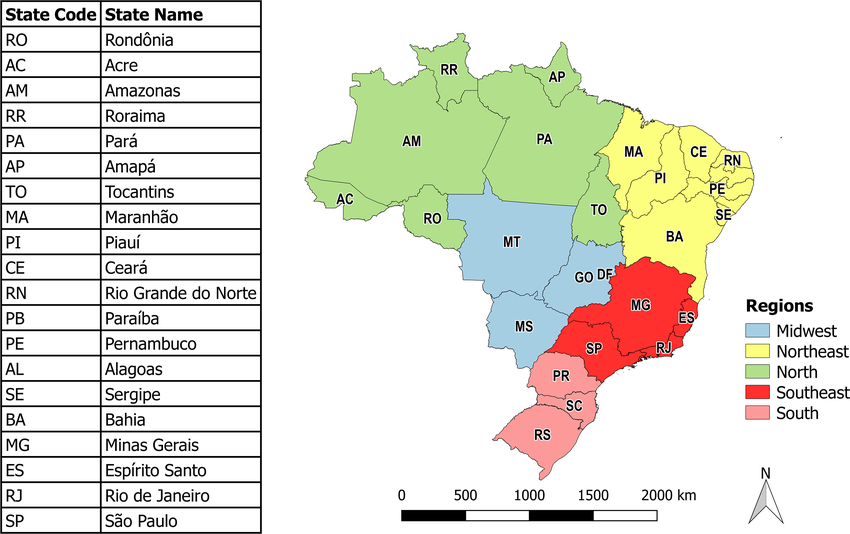

Source: https://www.researchgate.net/figure/Administrative-division-of-Brazil_fig1_349720725

Instituto Brasileiro de Geografia e Estatística (IBGE) membagi negara-negara bagian di brazil kedalam 5 wilayah geografis/region

*Source: www.ibge.gov.br

In [ ]:
# Define the region mapping
region_mapping = {
    'North': ['AC', 'AM', 'AP', 'RR', 'PA', 'RO', 'TO'],
    'Northeast': ['MA', 'PI', 'CE', 'RN', 'PB', 'SE', 'BA','PE','AL'],
    'Southeast': ['SP', 'RJ', 'MG', 'ES'],
    'South': ['PR', 'SC', 'RS'],
    'Midwest': ['MS', 'MT', 'GO', 'DF']
}

# Function to map states to regions
def map_region(state):
    for region, states in region_mapping.items():
        if state in states:
            return region
    return 'Unknown'  # In case the state is not found

# Apply the mapping function to create the 'customer_region' column
olist_new2['customer_region'] = olist_new2['customer_state'].apply(map_region)

In [ ]:
olist_new2

,customer_unique_id_y,customer_state,order_payment_gap_mnt,delivery_delay_hr,order,active_order,review_score,price,freight_value,payment_sequential,payment_value,payment_type_count,order_qty,product_category_n,product_volume_cm3,product_weight_g,product_name_lenght,product_description_lenght,product_photos_qty,customer_region
0,0000366f3b9a7992bf8c76cfdf3221e2,SP,14.850000,-99.189722,1,0,5.0,129.90,12.00,1.0,141.90,1.0,1.0,1.0,7616.0,1500.0,60.0,236.0,1.0,Southeast
1,0000b849f77a49e4a4ce2b2a4ca5be3f,SP,434.283333,-101.955000,1,0,4.0,18.90,8.29,1.0,27.19,1.0,1.0,1.0,5148.0,375.0,56.0,635.0,1.0,Southeast
2,0000f46a3911fa3c0805444483337064,SC,0.000000,-33.353611,1,0,3.0,69.00,17.22,1.0,86.22,1.0,1.0,1.0,43750.0,1500.0,49.0,177.0,3.0,South
3,0000f6ccb0745a6a4b88665a16c9f078,PA,19.600000,-266.615278,1,0,4.0,25.99,17.63,1.0,43.62,1.0,1.0,1.0,1045.0,150.0,43.0,1741.0,5.0,North
4,0004aac84e0df4da2b147fca70cf8255,SP,21.166667,-168.851111,1,0,5.0,180.00,16.89,1.0,196.89,1.0,1.0,1.0,528.0,6050.0,58.0,794.0,3.0,Southeast
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96091,fffcf5a5ff07b0908bd4e2dbc735a684,PE,14.666667,-638.633333,1,0,5.0,785.00,248.71,1.0,2067.42,1.0,2.0,1.0,251625.0,30000.0,54.0,478.5,1.0,Northeast
96092,fffea47cd6d3cc0a88bd621562a9d061,BA,8.400000,-49.527778,1,0,4.0,64.89,19.69,1.0,84.58,1.0,1.0,1.0,32076.0,1720.0,37.0,506.0,2.0,Northeast
96093,ffff371b4d645b6ecea244b27531430a,MT,13.466667,-707.248889,1,0,5.0,89.90,22.56,1.0,112.46,1.0,1.0,1.0,3315.0,600.0,57.0,716.0,5.0,Midwest
96094,ffff5962728ec6157033ef9805bacc48,ES,41.100000,-324.092778,1,0,5.0,115.00,18.69,1.0,133.69,1.0,1.0,1.0,4480.0,444.0,35.0,591.0,3.0,Southeast


In [ ]:
olist_new2['customer_region'].value_counts()

,count
customer_region,
Southeast,65893
South,13686
Northeast,9132
Midwest,5592
North,1793


In [ ]:
olist_new2 = olist_new2.drop('customer_state', axis=1)

In [ ]:
# Download the cleaning dataset
olist_new2.to_csv('olist_new2.csv', index=False)

##Encoding

In [ ]:
# One-hot Enc : List Kolom
onehot_var = ['customer_region']

# One-hot Enc
onehot_encoder = OneHotEncoder(drop='first')  #Kemungkinan yang akan di drop adalah midwest oleh scikit learn

In [ ]:
# Transformer
transformer = ColumnTransformer([
    ('Onehot', onehot_encoder, onehot_var)],
    remainder='passthrough')